# Understanding clustering using Mnist and CIFAR-10 Datasets

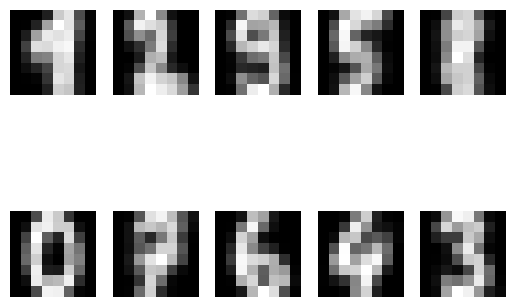

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

mnist = load_digits()

kmeans = KMeans(n_clusters=10).fit(mnist.data)
centroids = kmeans.cluster_centers_
predicted_clusters = kmeans.predict(mnist.data)


for i, c in enumerate(centroids):
    plt.subplot(2, 5, i+1)
    plt.imshow(c.reshape((8, 8)), cmap='gray')
    plt.axis('off')
plt.show()

Each of the images has a label corresponding to the digit that the image represents. These labels generate a clustering of the images where all images of digit 1 for example are in cluster labeled `1`. Comparing the [silhouette scores] of the above clustering to those of the clustering generated from the labels attached to each image.

In [164]:
from sklearn.metrics import silhouette_score

kmeans_silhouette_score = silhouette_score(mnist.data, predicted_clusters)
labels_silhouette_score = silhouette_score(mnist.data, mnist.target)
if kmeans_silhouette_score > labels_silhouette_score:
    print("The KMeans clustering has a higher silhouette score")
else:
    print("The clustering generated from the labels has a higher silhouette score")


The KMeans clustering has a higher silhouette score


Sihouette scores are in the range -1 to 1. 1 indicates that the data is well clustered, while -1 indicates that the samples are poorly clustered. Here, the KMeans clustering is better than the clustering generated from the labels, it means that the KMeans clustering has generated a better clustering of the images.

Plotting a random image from the `batch_1` of CIFAR-10 dataset

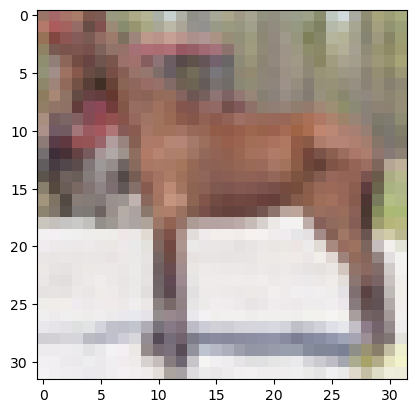

In [165]:
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar_data = unpickle("./cifar-10-batches-py/data_batch_1")

images = cifar_data[b'data']
random_index = np.random.randint(0, len(images))
random_image = images[random_index].reshape(3, 32, 32).transpose(1,2,0)
plt.imshow(random_image)
plt.show()

This image is 32 x 32 = 1024 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. So, in a way, we have a dataset of 1024 3-dimensional data points. By applying Kmeans to this dataset, I am clustering for similar colors (so all the blues might be in the same cluster etc.). The centroid of each cluster will also be an RGB color. I then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K colors to recreate the image.

Here is the above image with only 2 colours (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans)

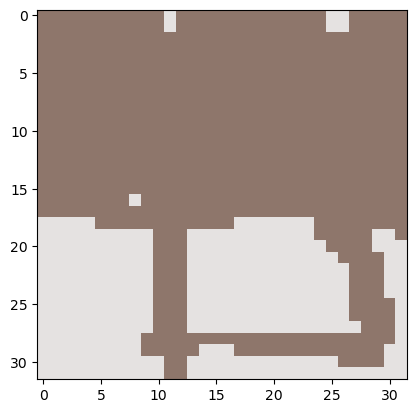

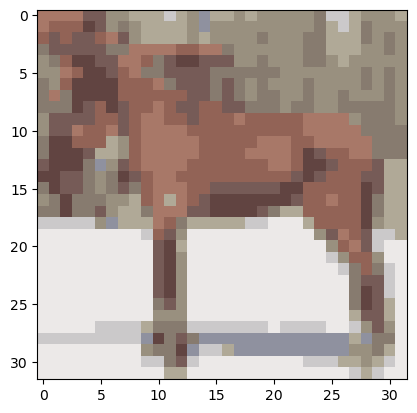

In [169]:
def image_clustering(image, num_colors):
    pixels = image.reshape(-1, 3)
    # Scale pixel values to [0, 1]
    pixels = pixels.astype('float32') / 255.0

    kmeans = KMeans(n_clusters=num_colors).fit(pixels)
    centroids = kmeans.cluster_centers_
    predicted_clusters = kmeans.predict(pixels)

    # Scale centroids back to [0, 255]
    centroids = (centroids * 255.0).astype(np.uint8)

    new_image = centroids[predicted_clusters].reshape(*image.shape)
    plt.imshow(new_image)
    plt.show()

image = random_image
image_clustering(image, 2)
image_clustering(image, 10)